In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("column_2C_weka.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [6]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [7]:
data.shape

(310, 7)

In [8]:
data.isnull().sum().sort_values(ascending=False)

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Bir üst satır ile data'daki eksik değerlerin sayısını öğrenebiliriz ve azalan şekilde sıralayabiliriz.

Çıktıda görüldüğü üzere hiçbir sütunda null değer bulunmamaktadır.

In [9]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


describe() metodu sayısal verilere sahip olan sütunların max, min, std… gibi istatiksel değerlerini döndürür.

Sayısal olmayan tüm sütunların istatiksel özetini görmek istiyorsak include=[‘O’] parametresini kullanmalıyız:

In [10]:
data.describe(include=['O'])

,class
count,310
unique,2
top,Abnormal
freq,210


In [11]:
data["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Bir üst satır ile class sütununda bulunan her bir türden kaç adet bulunduğu bilgisini elde ettik. 

In [12]:
data[data["class"]=="Normal"]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


Çıktıda görüldüğü üzere class değeri Normal olan satırlara eriştik. Class değeri Normal olan 100 adet satır mevcut.

In [13]:
data[data["class"]=="Abnormal"]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Abnormal
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Abnormal
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Abnormal


Class değeri Abormal olan 210 adet satır mevcut.

In [14]:
data.groupby("class")["pelvic_incidence"].mean().head(10)

class
Abnormal    64.692562
Normal      51.685244
Name: pelvic_incidence, dtype: float64

Bir üst satırdaki kod ile verileri class bilgilerine göre gruplandırdık ve her bir class'ın ortalama pelvic_incidence değerini hesapladık.

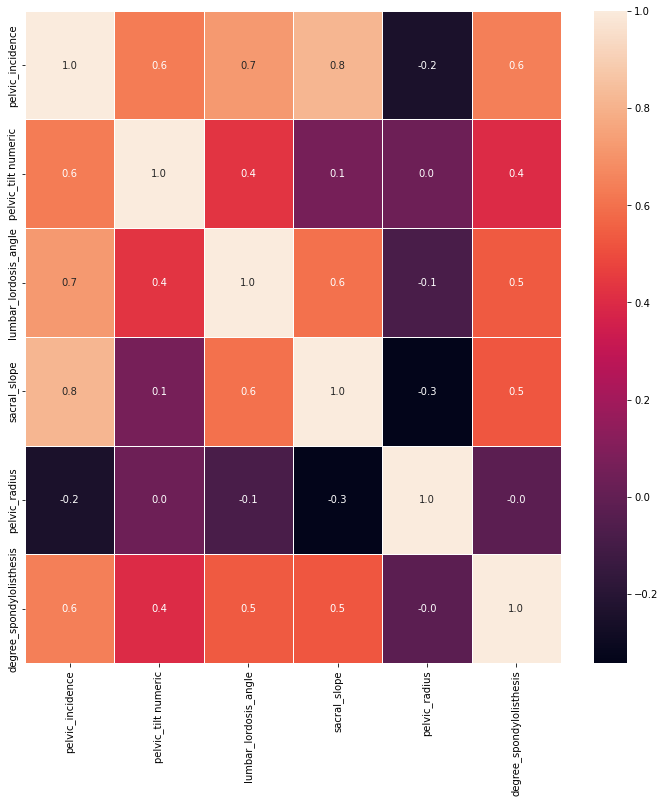

In [15]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show() 

Text(0.5, 1.0, 'pelvic_incidence sacral_slope Scatter Plot')

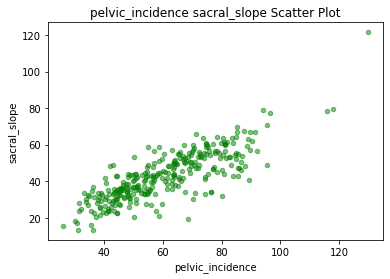

In [16]:
#SCATTER PLOT

data.plot(kind='scatter', x='pelvic_incidence', y='sacral_slope',alpha = 0.5,color = 'green')
plt.xlabel('pelvic_incidence')              
plt.ylabel('sacral_slope')
plt.title('pelvic_incidence sacral_slope Scatter Plot')  

Yukarıda yaptığımız gibi, amacımız iki tane feature arasındaki ilişkiyi yani correlation'u bulmak ise Scatter plot kullanabiliriz.

Veri setini biraz incelemenin ardından Supervised Learning algoritmalarını uygulayalım.

SVM :

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = data.drop(['class'], axis=1)
y = data.iloc[:, 6].values


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)


svm = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=2, loss="hinge")),
])
svm.fit(X, y)

predict = svm.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))
print(" ")
print("SVM algorithm score is:",svm.score(x_test,y_test))

[[46  8]
 [ 6 18]]
 
SVM algorithm score is: 0.8205128205128205


C:\Users\raziy\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Naive Bayes :

In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes algorithm score is: ",nb.score(x_test,y_test))

Naive Bayes algorithm score is:  0.7692307692307693


Decision Tree:

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train, y_train)

print("Decision Tree algorithm score is: ",dt.score(x_test,y_test))

Decision Tree algorithm score is:  0.7948717948717948


Random Forest:

Random Forest algorithm score is:  0.8205128205128205


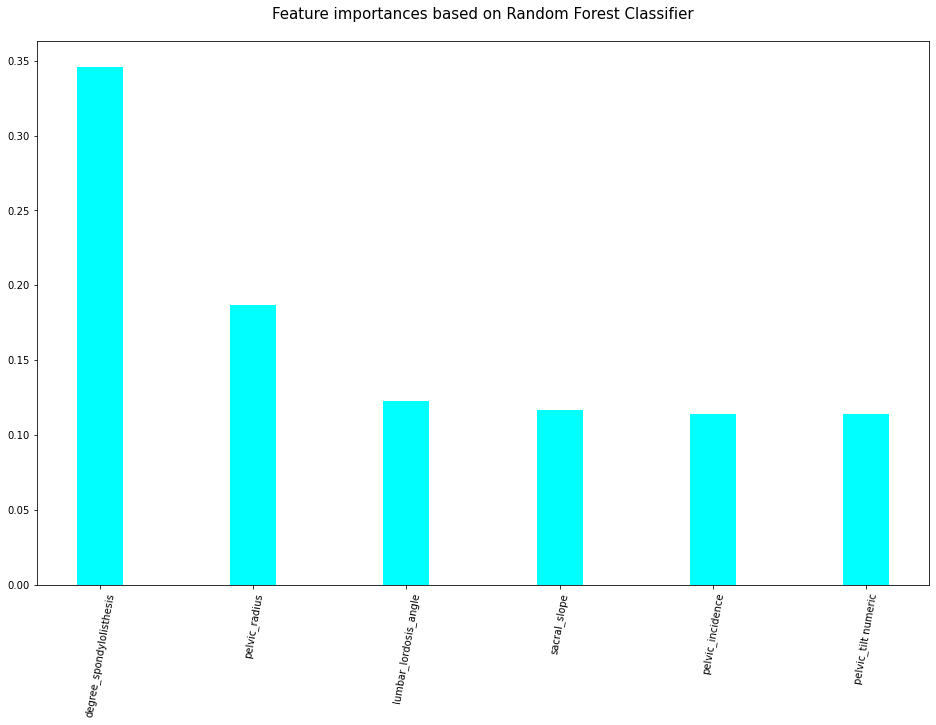

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf.fit(x_train,y_train)
print("Random Forest algorithm score is: ",rf.score(x_test,y_test))
    
ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:47]
columns = X.columns

f=plt.figure(figsize=(16,10))
plt.title("Feature importances based on Random Forest Classifier", y = 1.03, size = 15)
plt.bar(range(len(features)), ranking[features],width=0.3, color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8076923076923077
RandomForestClassifier 0.8076923076923077
SVC 0.8205128205128205
VotingClassifier 0.8333333333333334
